#PARTE I
##1. Plantea un diseño de test de hipótesis que te gustaría aplicar (1pt)

* Se requiere conocer la cantidad en gramos de zinc que contienen las baterías AAA fabricadas en la empresa.
* Es necesario conocer el contenido de zinc para saber cómo disponerlo una vez las baterías cumplan su ciclo de vida.
* Se tiene una muestra de 50 baterías que dan una media muestral de 2.12 gramos de zinc y una desviación estándar de 0.12gr.
* según estos datos ¿Es posible concluir que la media de la población de la masa de zinc es superior a 2 gr por batería con un nivel de significancia de 0.01?
* H0 => La media de la población de la masa de zinc presente en la batería es 2.0
* Ha => La media de la población de la masa de zinc presente en la batería es > 2.0

##¿Cuál es el propósito del valor crítico en un test de hipótesis?

C) Marcar el límite entre rechazar y no rechazar la hipótesis nula.

*   El valor crítico ayuda a tomar la decisión de rechazar o no la hipótesis nula y, por lo tanto, está relacionado con el límite entre las dos decisiones posibles en un test de hipótesis.
*   En el ejemplo propuesto, si la estadística de prueba es mayor que el valor crítico de 0.01, entonces se rechaza la hipótesis nula y se concluye que hay evidencia suficiente para sugerir que la media de la población es mayor a 2 gramos.
## ¿Qué representa el Error Tipo II?
2. No rechazar incorrectamente la hipótesis nula

En otras palabras, un error Tipo II implica no rechazar la hipótesis nula Ho cuando es falsa. En el ejemplo, el Error Tipo II se da si a pesar de que la media real de la población es superior a 2.0 gramos por batería, la prueba estadística no detecta esta diferencia y no se rechaza la hipótesis nula de que la media es igual a 2.0 gramos. El error se comete al no identificar correctamente la verdadera condición de la población.
##Si realizas un test de una cola y obtienes un p-valor de 0.02 con un nivel de significancia de 0.05, ¿qué decisión tomarías?

* Rechazar la hipótesis nula

* En un test de una cola, se puede plantear rechazar la hipótesis nula si el p-valor es menor que el nivel de significancia, porque esto indica que hay evidencia suficiente para respaldar la hipótesis alternativa.  en la dirección especificada por la prueba.

* En el ejemplo dado, se puede concluir que hay evidencia significativa para sugerir que la media de la población de la masa de zinc en las baterías es mayor a 2 gramos por batería.

##¿Cuál es la relación entre nivel de significancia y la probabilidad de cometer un Error Tipo I?

*   Reducir el nivel de significancia aumenta la probabilidad de cometer un error Tipo I

 Al reducir el nivel de significancia, se esta siendo más conservador y esto disminuye la probabilidad de rechazar la hipótesis nula cuando es verdadera. Por otro lado, esto también significa que se está aumentando la probabilidad de no rechazar la hipótesis nula cuando se debería, lo que se implica aumentar la probabilidad de cometer un Error Tipo II.



##PARTE II
Una empresa de ecommerce B2B se plantea utilizar una funcionalidad para su web que le permite hacer una recomendación de producto a sus usuarios con el objetivo de aumentar el valor medio de las ventas.

De cara a validar que este sistema de recomendación tiene un efecto positivo nuestra empresa decide plantear un Test de Hipótesis y testear el servicio durante 3 meses antes de decidir si lo deben adoptar o no en base al posible efecto incremental en las ventas.

El dataset adjunto incluye los datos finales del test y contiene tres columnas.
* La primera es el identificador de la venta,
* La segunda es el valor de la venta y
* El tercero es la clase (1 para las ventas en las que el sistema de recomendación ha participado y 0 en las que no ha participado)





## <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [33]:
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [34]:
library(ggplot2)
library(gridExtra)
library(dplyr)

## <font color='#3d59c6'>  CARGA DE DATOS </font>

Group [0]>> para las ventas en las que el sistema de recomendación **NO** ha participado

Group [1]>> para las ventas en las que el sistema de recomendación ha participado

In [35]:
#cargamos el fichero 202311s20_b2b_ecommerce_sales_data.csv a nuestro entorno jupyter
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_ecommerce y checkeamos los datos cargados

data_ecommerce = read.csv(file='202311s20_b2b_ecommerce_sales_data.csv', stringsAsFactors = F, sep = ',')
head(data_ecommerce)#de forma predefinida retorna las primeras 6 observations
tail(data_ecommerce)#de forma predefinida retorna las últimas 6 observations

,Reference,Order.Value,Group
,<int>,<dbl>,<int>
1,570554,0.38,1
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
6,540833,0.65,1


,Reference,Order.Value,Group
,<int>,<dbl>,<int>
11781,578315,9467.23,0
11782,551698,9468.60,1
11783,556090,9471.27,0
11784,537253,9473.16,1
11785,554094,9475.20,1
11786,557888,9476.80,1


In [36]:
#podemos usar las funciones names() y dim() para observar el nombre de las variables y ver cuantos registros y columnas tenemos
names(data_ecommerce)
dim(data_ecommerce)

[1] "Reference"   "Order.Value" "Group"

[1] 11786     3

In [37]:
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data_ecommerce)

'data.frame':	11786 obs. of  3 variables:
 $ Reference  : int  570554 567869 539441 542736 573589 540833 560217 542136 549534 540945 ...
 $ Order.Value: num  0.38 0.4 0.42 0.55 0.55 0.65 0.79 0.84 0.84 0.85 ...
 $ Group      : int  1 0 0 0 0 1 1 1 1 0 ...


###Separamos los en 2 datasets basados en el tipo de Clase 0, 1

In [38]:
# Creamos dos data sets separados: uno para la clase 1 y otro para la clase 0
data_clase_1 <- subset(data_ecommerce, Group == 1)
data_clase_0 <- subset(data_ecommerce, Group == 0)

# Se muestran los primeros y últimos registros de cada data set
head(data_clase_1)
tail(data_clase_1)

head(data_clase_0)
head(data_clase_0)

,Reference,Order.Value,Group
,<int>,<dbl>,<int>
1,570554,0.38,1
6,540833,0.65,1
7,560217,0.79,1
8,542136,0.84,1
9,549534,0.84,1
13,551538,0.85,1


,Reference,Order.Value,Group
,<int>,<dbl>,<int>
11777,571709,9464.28,1
11778,552571,9464.44,1
11782,551698,9468.60,1
11784,537253,9473.16,1
11785,554094,9475.20,1
11786,557888,9476.80,1


,Reference,Order.Value,Group
,<int>,<dbl>,<int>
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
10,540945,0.85,0
11,544438,0.85,0


,Reference,Order.Value,Group
,<int>,<dbl>,<int>
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
10,540945,0.85,0
11,544438,0.85,0


## <font color='#3d59c6'>  REALIZAR ANÁLISIS DESCRIPTIVO </font>

##1. Exploración de los datos: análisis descriptivos de los datos, gráficación y conclusiones ¿siguen una distribución normal?(2pts)


In [39]:
summary(data_clase_0)

   Reference       Order.Value         Group  
 Min.   :536365   Min.   :   0.4   Min.   :0  
 1st Qu.:547524   1st Qu.: 475.2   1st Qu.:0  
 Median :558622   Median :2170.6   Median :0  
 Mean   :558874   Mean   :3024.8   Mean   :0  
 3rd Qu.:570255   3rd Qu.:5191.5   3rd Qu.:0  
 Max.   :581587   Max.   :9471.3   Max.   :0  

In [40]:
summary(data_clase_1)

   Reference       Order.Value          Group  
 Min.   :536366   Min.   :   0.38   Min.   :1  
 1st Qu.:547647   1st Qu.: 601.39   1st Qu.:1  
 Median :558632   Median :2526.08   Median :1  
 Mean   :558891   Mean   :3173.84   Mean   :1  
 3rd Qu.:570406   3rd Qu.:5283.07   3rd Qu.:1  
 Max.   :581583   Max.   :9476.80   Max.   :1  

En ambos grupos se puede observar que la media y la mediana no tienen valores cercanos. Es posible que haya una asimetría positiva con mas datos a la izquierda de la media

In [41]:

print("Valores SD Grupo 0")
lapply(data_clase_0[, 2, drop = FALSE], sd)


[1] "Valores SD Grupo 0"


$Order.Value
[1] 2817.731

In [42]:
print("Valores SD Grupo 1")
lapply(data_clase_1[, 2, drop = FALSE], sd)

[1] "Valores SD Grupo 1"


$Order.Value
[1] 2795.303

In [43]:
print("Valores Varianza Grupo 0")
lapply(data_clase_0[, 2, drop = FALSE], var)

[1] "Valores Varianza Grupo 0"


$Order.Value
[1] 7939606

In [44]:
print("Valores Varianza Grupo 1")
lapply(data_clase_1[, 2, drop = FALSE], var)

[1] "Valores Varianza Grupo 1"


$Order.Value
[1] 7813720

Se observa una alta dispersion de los datos en ambos grupos 0 y 1

In [47]:
#attach() nos permite acceder directamente a las "columnas" de un data frame usando simplemente el nombre de la columna

attach(data_clase_0)
attach(data_clase_1)

The following objects are masked from data_clase_0:

    Group, Order.Value, Reference




In [51]:
#finalmente observamos si existen valores NA o outliers para cada Grupo
#Grupo 0
sum(is.na(data_clase_0))
cat("Outliers in Group 0: ", boxplot(Group, plot=F)$Out)

[1] 0

Outliers in Group 0: 

In [52]:
#finalmente observamos si existen valores NA o outliers para cada Grupo
#Grupo 1
sum(is.na(data_clase_1))
cat("Outliers in Group 1: ", boxplot(Group, plot=F)$Out)

[1] 0

Outliers in Group 1: 

No hay ningun outlier en ninguno de los dos grupos [0,1]

#####Usando el Numero de scott para tener una idea aproximada del # bins adecuado

In [74]:

#Grupo 0
desviacion_estandar_G0 <- sd(data_clase_0$Order.Value)
numero_observaciones_G0 <- nrow(data_clase_0)

# Calcular el ancho del bin según la Regla de Scott
ancho_bin_G0 <- (3.5 * desviacion_estandar_G0) / (numero_observaciones_G0^(1/3))

# Calcular el rango de datos
rango_datos_G0 <- max(data_clase_0$Order.Value) - min(data_clase_0$Order.Value)

# Calcular el número de bins
numero_bins_G0 <- rango_datos_G0 / ancho_bin_G0

# Redondear al entero más cercano
numero_bins_G0 <- round(numero_bins_G0)
print(numero_bins_G0)

[1] 17


In [66]:

#Grupo 1
desviacion_estandar_G1 <- sd(data_clase_1$Order.Value)
numero_observaciones_G1 <- nrow(data_clase_1)

# Calcular el ancho del bin según la Regla de Scott
ancho_bin_G1 <- (3.5 * desviacion_estandar_G1) / (numero_observaciones_G1^(1/3))

# Calcular el rango de datos
rango_datos_G1 <- max(data_clase_1$Order.Value) - min(data_clase_1$Order.Value)

# Calcular el número de bins
numero_bins_G1 <- rango_datos_G1 / ancho_bin_G1

# Redondear al entero más cercano
numero_bins_G1 <- round(numero_bins_G1)
print(numero_bins_G1)

[1] 18


###Histogramas y Box Plots

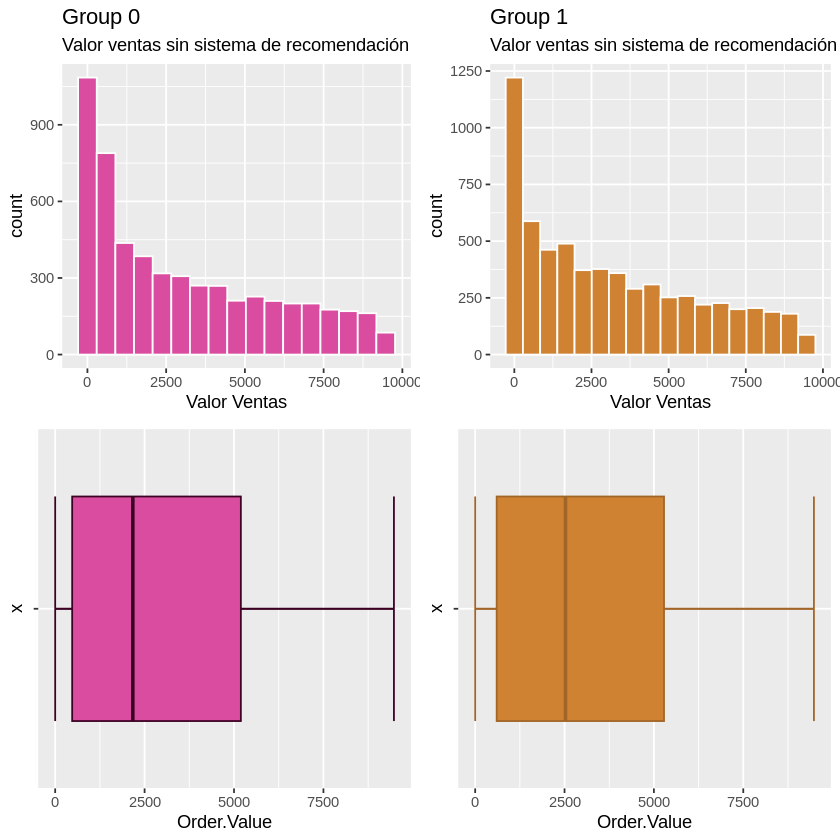

In [73]:
a= ggplot(data_clase_0) + #señalamos el dataframe
  aes(x = Order.Value) + #indicamos la variable
  geom_histogram(bins = 17 ,fill = "#d94c9f",color = "white") + #color del contorno
  labs(title="Group 0"  ,subtitle = "Valor ventas sin sistema de recomendación",x = "Valor Ventas")  #nombre variable eje x
b= ggplot(data = data_clase_0, aes(x = "", y = Order.Value)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
a1= ggplot(data_clase_1) + #señalamos el dataframe
  aes(x = Order.Value) + #indicamos la variable
  geom_histogram(bins = 18 ,fill = "#cf8232",color = "white") + #color del contorno
  labs(title="Group 1"  ,subtitle = "Valor ventas sin sistema de recomendación",x = "Valor Ventas")  #nombre variable eje x
b1= ggplot(data = data_clase_1, aes(x = "", y = Order.Value)) +
       stat_boxplot(geom = "errorbar" ,color = "#a16527") +
       geom_boxplot(fill = "#cf8232",color = "#a16527") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,a1,b,b1)


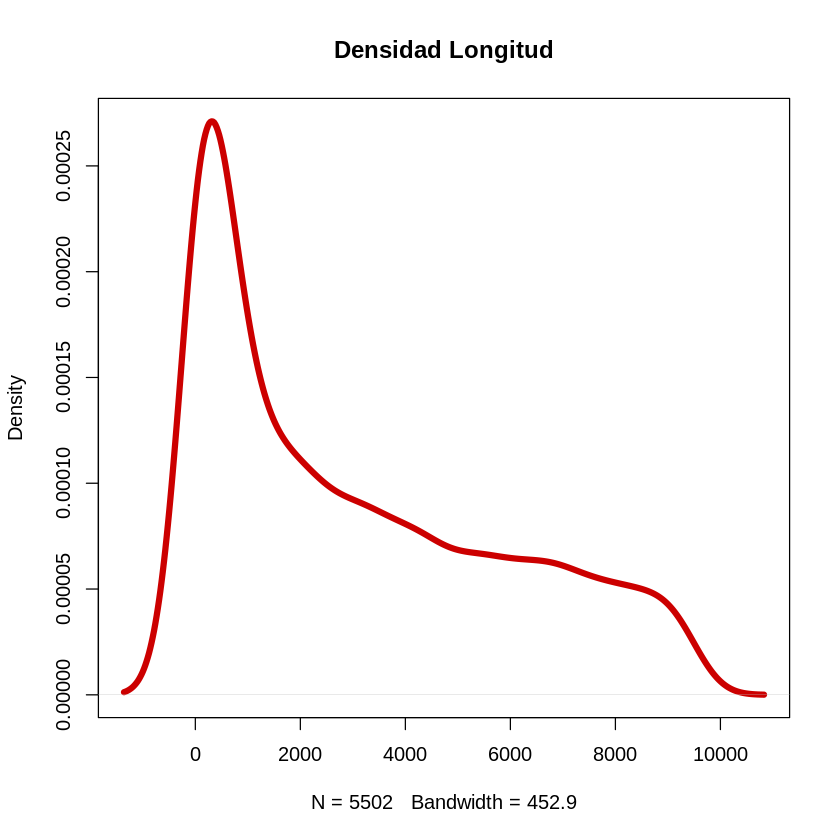

In [78]:
plot(density(data_clase_0$Order.Value)
        ,col = "#cc0000"
        , lwd = 5
        ,main = "Densidad Longitud" #título del gráfico
    )

Se observa en ambos histogramas, que la mayor cantidad de ventas se encuentran en el rango de 0 a $500.

Como se había intuido antes, ambas están sesgadas hacia la izquierda (tienen una asimetria positiva)

Por otro lado, el density Plot se asemeja bastante a lo obtenido en el gráfico del histograma

## Gráfico QQ para ambos grupos

Gráfico para ver si la variable muestral mantiene o no de una distribución normal

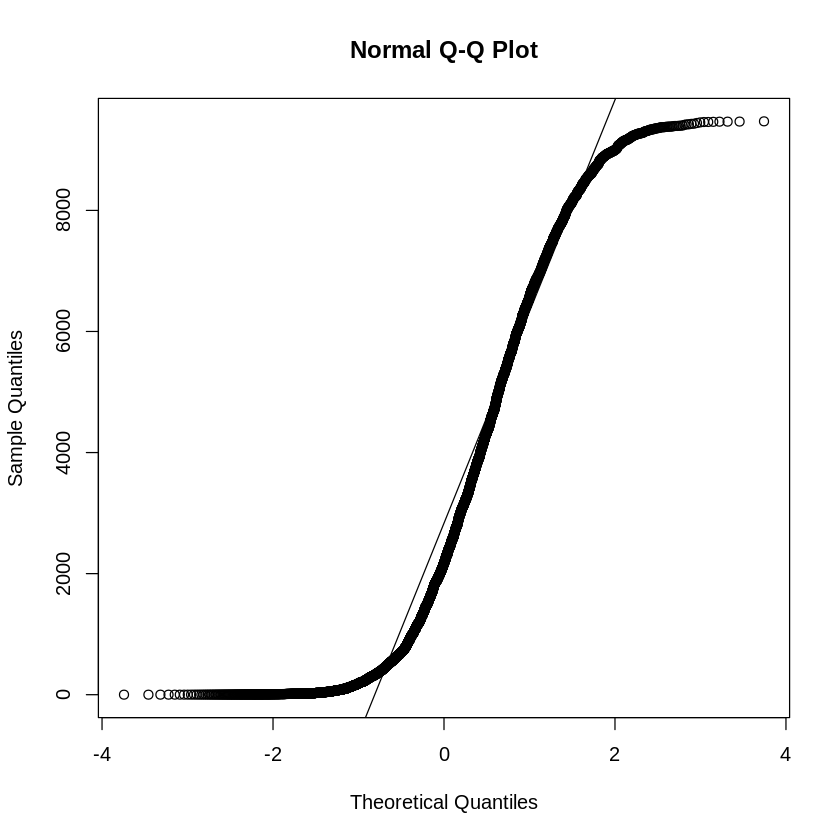

In [76]:
# qq-plot para Grupo 0:
qqnorm(data_clase_0$Order.Value)
# Linea de referencia
qqline(data_clase_0$Order.Value)

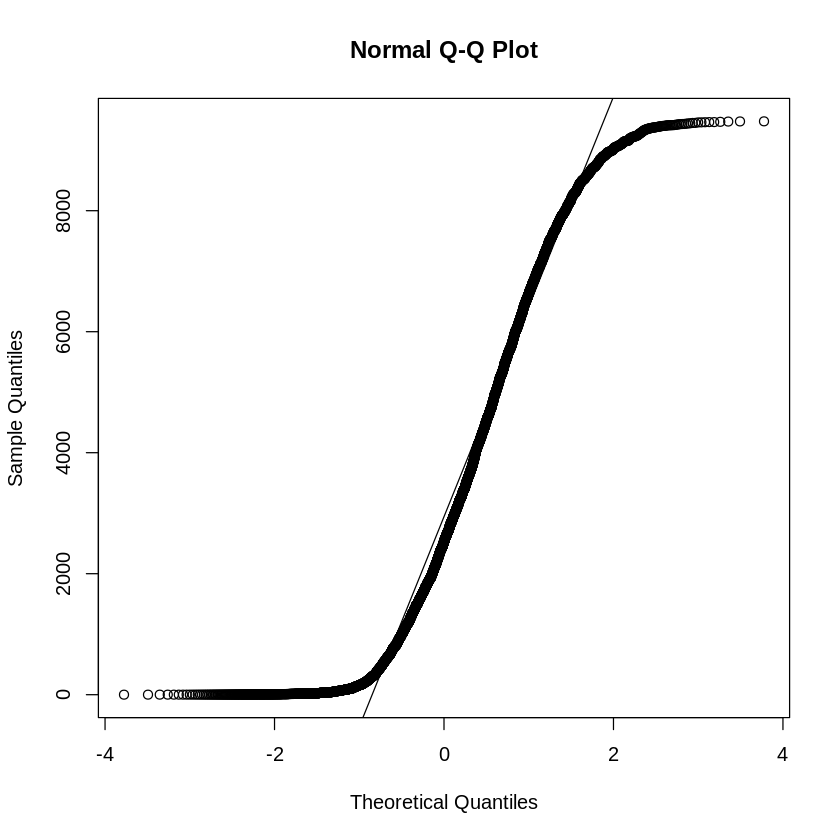

In [77]:
# qq-plot para Grupo 1:
qqnorm(data_clase_1$Order.Value)
# Linea de referencia
qqline(data_clase_1$Order.Value)

In [79]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [80]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




[1] 5502 5501

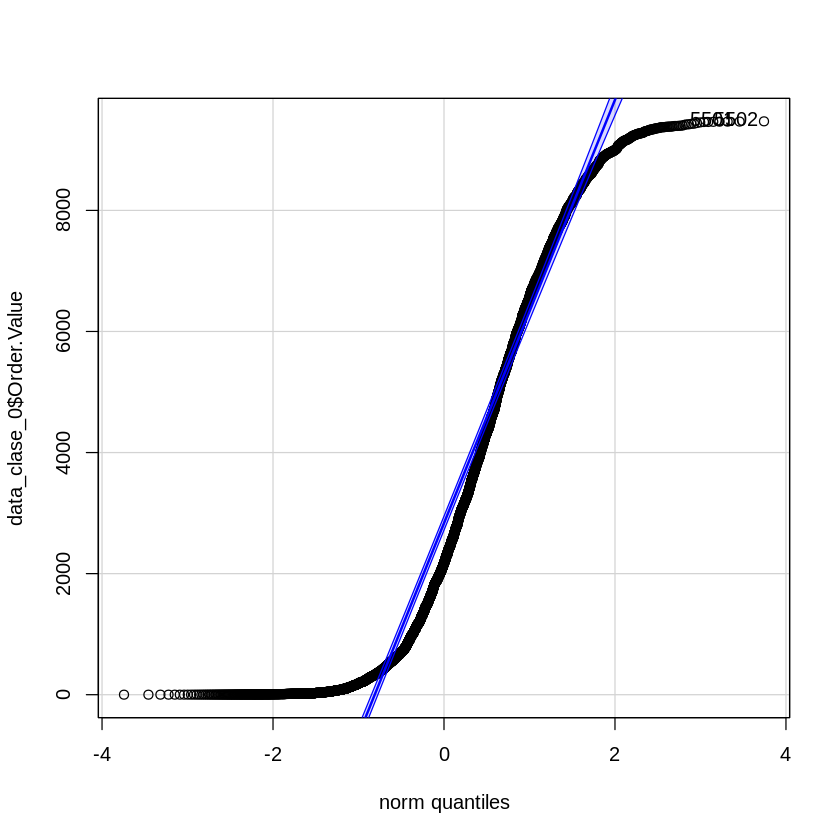

In [81]:
qqPlot(data_clase_0$Order.Value)

Los gráficos Q-Q plot de ambos casos para las ventas con o sin sistema de recomendación, no siguen una distribución normal en ambos extremos, como se puede ver en la gráfica.


Cuando se enfrenta a una distribución no normal, el primer paso suele ser aplicar la transformación logarítmica a los datos y volver a verificar si los datos transformados logarítmicamente se distribuyen normalmente.
La aplicación de la transformación logarítmica se puede hacer con la función log().

In [83]:
# Supongamos que tienes un data frame llamado 'data_clase_0' con la columna 'valor_venta'
data_clase_0$log_Ordervalue <- log(data_clase_0$Order.Value)

# Mostrar el resultado
head(data_clase_0)
tail(data_clase_0)

,Reference,Order.Value,Group,log_Ordervalue
,<int>,<dbl>,<int>,<dbl>
2,567869,0.40,0,-0.9162907
3,539441,0.42,0,-0.8675006
4,542736,0.55,0,-0.5978370
5,573589,0.55,0,-0.5978370
10,540945,0.85,0,-0.1625189
11,544438,0.85,0,-0.1625189


,Reference,Order.Value,Group,log_Ordervalue
,<int>,<dbl>,<int>,<dbl>
11774,567336,9460.62,0,9.154893
11776,576388,9463.08,0,9.155153
11779,537160,9465.60,0,9.155419
11780,546034,9466.23,0,9.155486
11781,578315,9467.23,0,9.155592
11783,556090,9471.27,0,9.156018


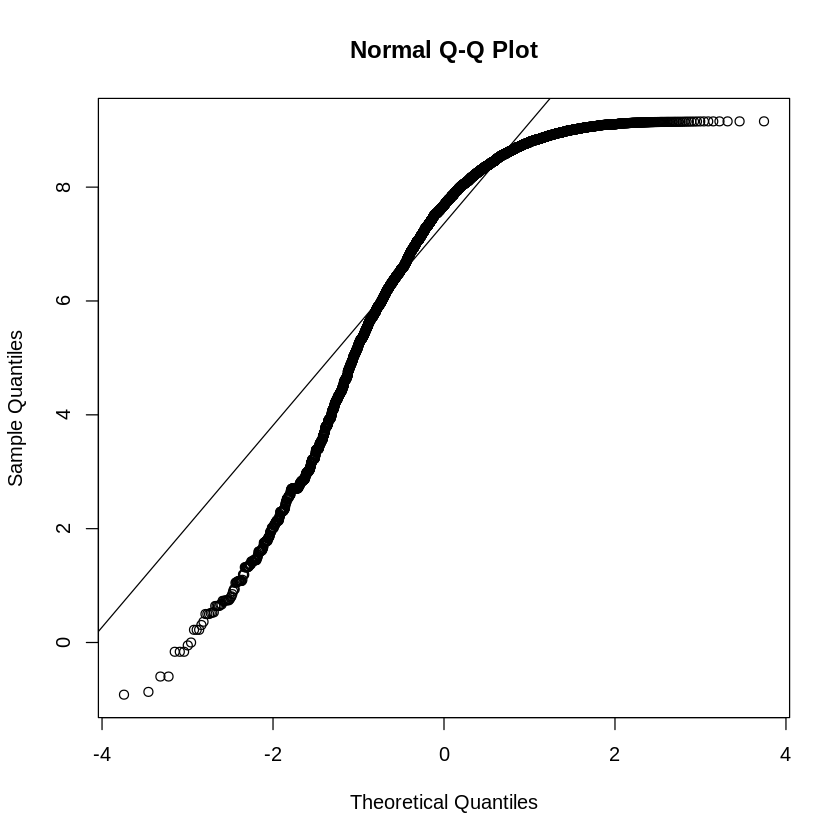

In [87]:
# Grafica los puntos:
qqnorm(data_clase_0$log_Ordervalue)
# Grafica la línea de referencia:
qqline(data_clase_0$log_Ordervalue)

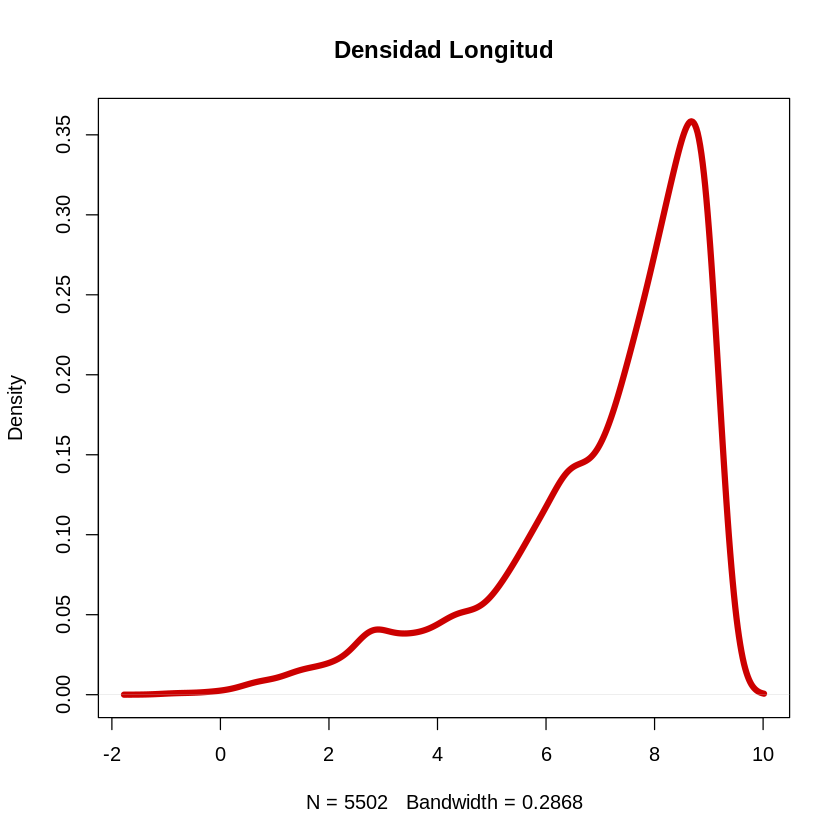

In [85]:
plot(density(data_clase_0$log_Ordervalue)
        ,col = "#cc0000"
        , lwd = 5
        ,main = "Densidad Longitud" #título del gráfico
    )

###Valores de Orden de hasta 2500

In [118]:
data_filtrado <- subset(data_clase_0, Order.Value >= 5000 & Order.Value <=8000)
head(data_filtrado)
tail(data_filtrado)

,Reference,Order.Value,Group,log_Ordervalue
,<int>,<dbl>,<int>,<dbl>
8648,560598,5002.20,0,8.517633
8649,558746,5003.57,0,8.517907
8650,580049,5004.90,0,8.518173
8653,546642,5009.04,0,8.519000
8654,558770,5011.80,0,8.519550
8656,567295,5014.26,0,8.520041


,Reference,Order.Value,Group,log_Ordervalue
,<int>,<dbl>,<int>,<dbl>
10876,544668,7974.24,0,8.983972
10881,544065,7978.88,0,8.984553
10883,569221,7988.30,0,8.985733
10884,543369,7989.28,0,8.985856
10885,541968,7991.11,0,8.986085
10888,572667,7996.28,0,8.986732


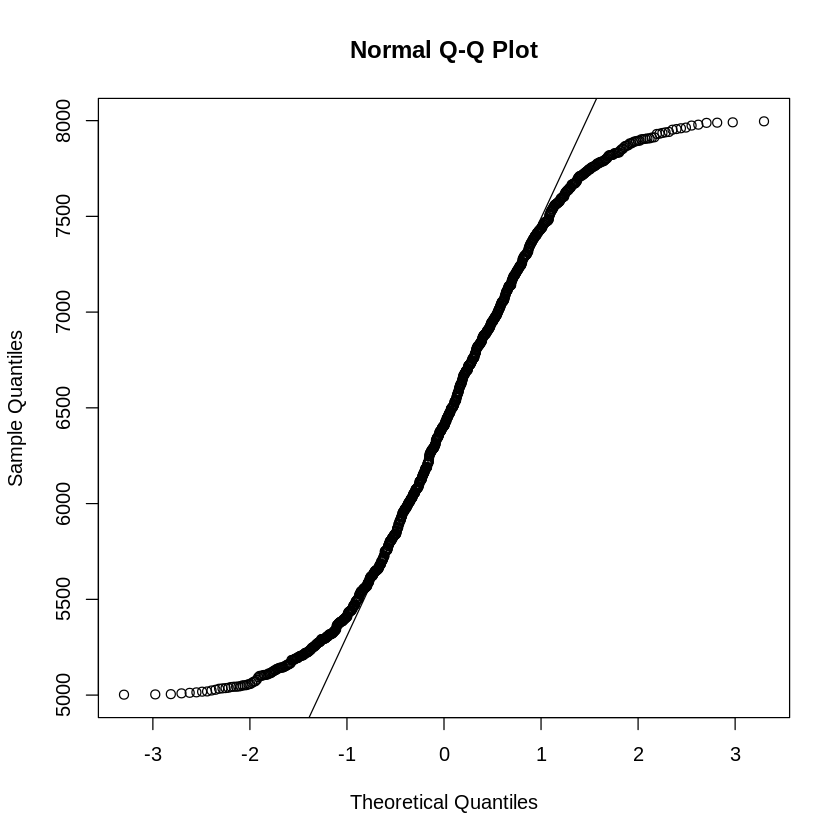

In [119]:
# Grafica los puntos:
qqnorm(data_filtrado$Order.Value)
# Grafica la línea de referencia:
qqline(data_filtrado$Order.Value)

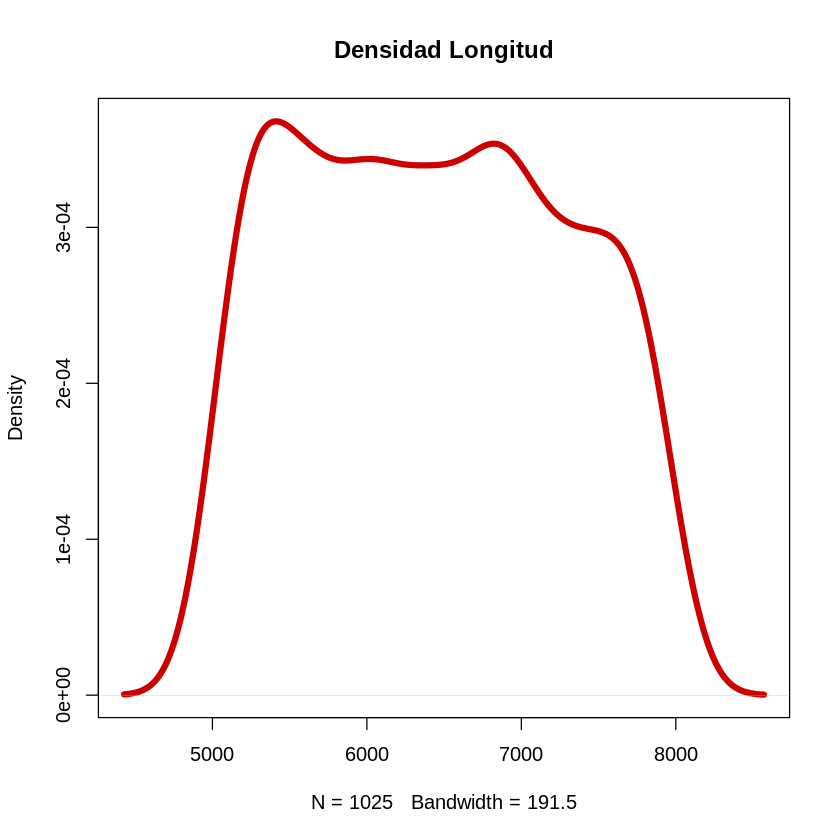

In [120]:
plot(density(data_filtrado$Order.Value)
        ,col = "#cc0000"
        , lwd = 5
        ,main = "Densidad Longitud" #título del gráfico
    )

Luego de someter los datos a una funcion logarítmica, vemos que tampoco tienen un comportamiento normal. Se intento tambien tomar los primeros 2500 datos o un rango entre 5000 y 8000 y tampoco siguen una distribucion normal como se puede ver en los Q-Q plots

##2. Diseña un test de hipótesis: ¿cuál es nuestro objetivo? ¿se trataría de un test de 2 colas? ¿Qué estadístico debemos usar para este Test?(2pts)

Si la distribución hubiera sido normal, se podria plantear un test de 2 colas en donde estamos interesados en saber si hay alguna diferencia en las ventas, no si las del grupo 0 o grupo 1 son mayores o no.

Utilizamos una T Test de muestra independiente de dos colas para las medias:

Hipótesis nula:
$H_{0}: µ{Grado 0} - µ{Grado 1} = 0$ (El sistema de recomendación no tiene efecto sobre las ventas)


Hipótesis alternativa:
$H_{1}: µ{Grado 0} - µ{Grado 1} {\ne} 0$ (El sistema de recomendación tiene un efecto significativo en las ventas)

## 3. Validación y ejecución del test de hipótesis (2pts)


###Prueba de prueba de Wilcoxon-Mann-Whitney

Hipótesis nula de que no hay diferencia entre las distribuciones de las ventas entre los dos grupos (ventas en las que el sistema de recomendación ha o no  participado.

In [121]:


# Realizar la prueba de Wilcoxon-Mann-Whitney
resultado_prueba <- wilcox.test(Order.Value ~ Group, data = data_ecommerce)

# Mostrar el resultado
print(resultado_prueba)


	Wilcoxon rank sum test with continuity correction

data:  Order.Value by Group
W = 16732250, p-value = 0.002597
alternative hypothesis: true location shift is not equal to 0



Como el valor p es lo suficientemente pequeño (en este caso se toma menor que 0.002597< 0.05), se puede rechazar la hipótesis nula y concluir que hay evidencia de una diferencia significativa en las ventas entre los dos grupos.

Para comparar, hacia adonde se observa la diferencia entre ventas, vamos a utilizar las medias y medianas que no dependen de la distribucion.


| Grupo   | Media   | Mediana|
|---------|---------|--------|
| Grupo 0 | 3024.8  |  2170.6|
| Grupo 1 | 3173.8  | 2526.1 |

Podemos observar que las ventas del Grupo 1 (Con sistema de recomendación) son significativamente mas altas, en comparación con las obtenidas por el Grupo 0 (Sin sistema de recomendación)


##4. Conclusiones: ¿Recomendarías el uso de este sistema de recomendación? (justifica tu respuesta) ¿Qué factores se deben tener en cuenta para la toma de esta decisión? (2pts)

* Varios factores pueden estar haciendo que la distribución de los datos no sea gaussiana. Hay una clara asimetría hacia las ventas de menor importe. habría que examinar si las ventas se ven influenciadas por incrementos en ciertos periodos del año, cambios en la demanda por factores externos. Puede ser interesante también categorizar las ventas y hacer el análisis con esos datos, ya que se tienen mínimos de por debajo de 1 y máximos por encima de 9000.

* Es recomendable el uso del sistema de recomendación. El test de Wilcoxon-Mann-Whitney, es una prueba que se utiliza para comparar dos grupos independientes cuando los datos no siguen una distribución normal como en este caso. El test da como resultado que se rechaza la hipótesis nula, es decir que hay una diferencia significativa en las ventas. Cuando se comparan los valores de la media y la mediana en ambos grupos, se observa que hay un aumento en las ventas en los datos del sistema con recomendación.


